In [1]:
import pandas as pd 
import numpy as np
import plotly.graph_objs as go
from plotly.offline import iplot

from algorithms.branch_and_bound import branch_and_bound as bnb
from algorithms.dynamic_programming import dynamic_programming as dynamic
from algorithms.greedy import greedy_algorithm as greedy
from algorithms.genetic import genetic_algorithm as genetic
from tools.benchmark_loader import get_all_knapsacks
from tools.test_methods import run_tests
from tools.make_measurements import get_time

# Laboratory work 2
## Knapsack 0-1 problem
Done by *Aroslankin, Kuklin, Kislitsyna*.     
There are tests and comparisons of the 4 algorithms for knapsack 0-1 problem.    
***Exact algorithms:***     
* [Dynamic programming]()
* [Branch and Bound]()   

***Heuristic algorithms:***     
* [Greedy]() 
* [Genetic algorithm]()
  

### Loading of the benchmarks
[The benchmarks source №1](https://people.sc.fsu.edu/~jburkardt/datasets/knapsack_01/knapsack_01.html)   
[The benchmarks source №2](http://artemisa.unicauca.edu.co/~johnyortega/instances_01_KP/)

In [12]:
knapsacks = get_all_knapsacks()
for knapsack in knapsacks:
    if knapsack['n'] != len(knapsack['weights']):
        print("Knapsack's size error!")
        

P01 is loaded!
P02 is loaded!
P03 is loaded!
P04 is loaded!
P05 is loaded!
P06 is loaded!
P07 is loaded!
f9_l-d_kp_5_80 is loaded!
f7_l-d_kp_7_50 is loaded!
f3_l-d_kp_4_20 is loaded!
f4_l-d_kp_4_11 is loaded!
f10_l-d_kp_20_879 is loaded!
f1_l-d_kp_10_269 is loaded!
f6_l-d_kp_10_60 is loaded!
f8_l-d_kp_23_10000 is loaded!
f2_l-d_kp_20_878 is loaded!
knapPI_1_5000_1000_1 is loaded!
knapPI_2_100_1000_1 is loaded!
knapPI_2_2000_1000_1 is loaded!
knapPI_3_200_1000_1 is loaded!
knapPI_1_500_1000_1 is loaded!
knapPI_1_200_1000_1 is loaded!
knapPI_1_10000_1000_1 is loaded!
knapPI_1_2000_1000_1 is loaded!
knapPI_3_1000_1000_1 is loaded!
knapPI_2_5000_1000_1 is loaded!
knapPI_3_500_1000_1 is loaded!
knapPI_2_10000_1000_1 is loaded!
knapPI_3_2000_1000_1 is loaded!
knapPI_3_100_1000_1 is loaded!
knapPI_1_1000_1000_1 is loaded!
knapPI_3_10000_1000_1 is loaded!
knapPI_2_200_1000_1 is loaded!
knapPI_3_5000_1000_1 is loaded!
knapPI_2_1000_1000_1 is loaded!
knapPI_2_500_1000_1 is loaded!
knapPI_1_100_1

### Dynamic programming algorithm


#### Testing 

In [9]:
test_dynamic = run_tests(knapsacks[:20], methods=[dynamic], lim_sec=30, file_name='test_dynamic')
test_dynamic[["Knapsack's ID", 'Number of items', 'Optimal profit', 'Found profit', 'Passed']]

,Knapsack's ID,Number of items,Optimal profit,Found profit,Passed
0,0,4,35,35,True
1,1,4,23,23,True
2,2,5,51,51,True
3,3,5,130,130,True
4,4,6,150,150,True
5,5,7,107,107,True
6,6,7,1735,1735,True
7,7,7,107,107,True
8,8,8,900,900,True
9,9,10,309,309,True


We've tested this algorithm with 20 benchmarks. Minimal number of items for knapsack is 4, maximal number is 200 
(Larger knapsacks and the answer of all cases will be shown below).        
This algorithm always returns exact answer. 

### Branch and bound algorithm


#### Testing 

In [10]:
test_bnb = run_tests(knapsacks[:20], methods=[bnb], lim_sec=30, file_name='test_bnb')
test_bnb[["Knapsack's ID", 'Number of items', 'Optimal profit', 'Found profit', 'Passed']]

,Knapsack's ID,Number of items,Optimal profit,Found profit,Passed
0,0,4,35,35,True
1,1,4,23,23,True
2,2,5,51,51,True
3,3,5,130,130,True
4,4,6,150,150,True
5,5,7,107,107,True
6,6,7,1735,1735,True
7,7,7,107,107,True
8,8,8,900,900,True
9,9,10,309,309,True


Here we put the time limit of 30 seconds and some cases did not overcome it.     
But we can see that this algorithm always returns correct answers too.

### Greedy algorithm 

#### Testing 

In [11]:
test_greedy = run_tests(knapsacks[:20], methods=[greedy], lim_sec=30, file_name='test_greedy')
test_greedy[["Knapsack's ID", 'Number of items', 'Optimal profit', 'Found profit', 'Passed']]

,Knapsack's ID,Number of items,Optimal profit,Found profit,Passed
0,0,4,35,35,True
1,1,4,23,16,False
2,2,5,51,47,False
3,3,5,130,130,True
4,4,6,150,146,False
5,5,7,107,102,False
6,6,7,1735,1478,False
7,7,7,107,102,False
8,8,8,900,858,False
9,9,10,309,266,False


Greedy is the heuristic algorithm that is why sometimes it returns approximate answers.     
Here Greedy returned just 3 exact answers out of 20. The other found optimal profits are close to right solutions.

### Genetic algorithm 

#### Testing 

In [12]:
test_genetic = run_tests(knapsacks[:20], methods=[genetic], lim_sec=30, file_name='test_genetic')
test_genetic[["Knapsack's ID", 'Number of items', 'Optimal profit', 'Found profit', 'Passed']]

,Knapsack's ID,Number of items,Optimal profit,Found profit,Passed
0,0,4,35,35,True
1,1,4,23,23,True
2,2,5,51,51,True
3,3,5,130,130,True
4,4,6,150,150,True
5,5,7,107,107,True
6,6,7,1735,1735,True
7,7,7,107,107,True
8,8,8,900,900,True
9,9,10,309,284,False


Genetic algorithm is also the heuristic.            
It returned 14 exact answers out of 20. The other profits are very close to right solutions.

### Comparison of the time statistic for all methods 

##### Complexity of the algorithms
* Dynamic - $O(N * W)$, where N - number of items, W - capacity of the knapsack
* BnB - $O(2^{N-1}-1)$ (worse case)
* Greedy - $O(N * log(N))$
* Genetic - $O(N)$

In [13]:
table_time = get_time(knapsacks, iters=3, lim_sec=90)

In [10]:
pd.set_option('display.max_rows', None)
table_time = pd.read_csv('./data/output/time.csv')
table_time

,Unnamed: 0,Method,Knapsack's ID,Number of items,Mean,Median,Min,Max,Variance
0,0,dynamic_programming,0,4,0.00023396809895833334,0.000236,0.000172,0.000294,2.475506e-09
1,1,branch_and_bound,0,4,0.028904040654500324,0.034401,0.016738,0.035573,7.423589e-05
2,2,greedy_algorithm,0,4,2.106030782063802e-05,0.000008,0.000007,0.000048,3.611199e-10
3,3,genetic_algorithm,0,4,0.06227850914001465,0.063731,0.043729,0.079376,2.128386e-04
4,4,dynamic_programming,1,4,0.00013105074564615885,0.000133,0.000123,0.000137,3.275444e-11
5,5,branch_and_bound,1,4,0.020009676615397137,0.018260,0.016827,0.024942,1.250572e-05
6,6,greedy_algorithm,1,4,8.424123128255209e-06,0.000007,0.000006,0.000012,7.212798e-12
7,7,genetic_algorithm,1,4,0.04278063774108887,0.037536,0.018959,0.071847,4.799452e-04
8,8,dynamic_programming,2,5,0.00016601880391438803,0.000166,0.000157,0.000175,5.617393e-11
9,9,branch_and_bound,2,5,0.02475889523824056,0.024778,0.024429,0.025070,6.863715e-08


In [9]:
fig = go.FigureWidget(layout={'title': 'Mean of the time',
                        'font': {'size': 15, 'family': 'Courier'},
                             'template': 'plotly_dark'})
fig.add_trace(go.Bar(name='Dynamic', y=table_time[table_time.Method=='dynamic_programming'].Mean, x=table_time[table_time.Method=='dynamic_programming']["Knapsack's ID"]))
fig.add_trace(go.Bar(name='BnB', y=table_time[table_time.Method=='branch_and_bound'].Mean, x=table_time[table_time.Method=='branch_and_bound']["Knapsack's ID"]))
fig.add_trace(go.Bar(name='Greedy', y=table_time[table_time.Method=='greedy_algorithm'].Mean, x=table_time[table_time.Method=='greedy_algorithm']["Knapsack's ID"]))
fig.add_trace(go.Bar(name='Genetic', y=table_time[table_time.Method=='genetic_algorithm'].Mean, x=table_time[table_time.Method=='genetic_algorithm']["Knapsack's ID"]))

fig.update_xaxes(title="knapsack's id")
fig.update_yaxes(title="seconds")

fig.write_html('./data/output/mean_time.html', auto_open=False)
fig.show()



<img src="./data/output/meantime_half.png" width="600" align="center">

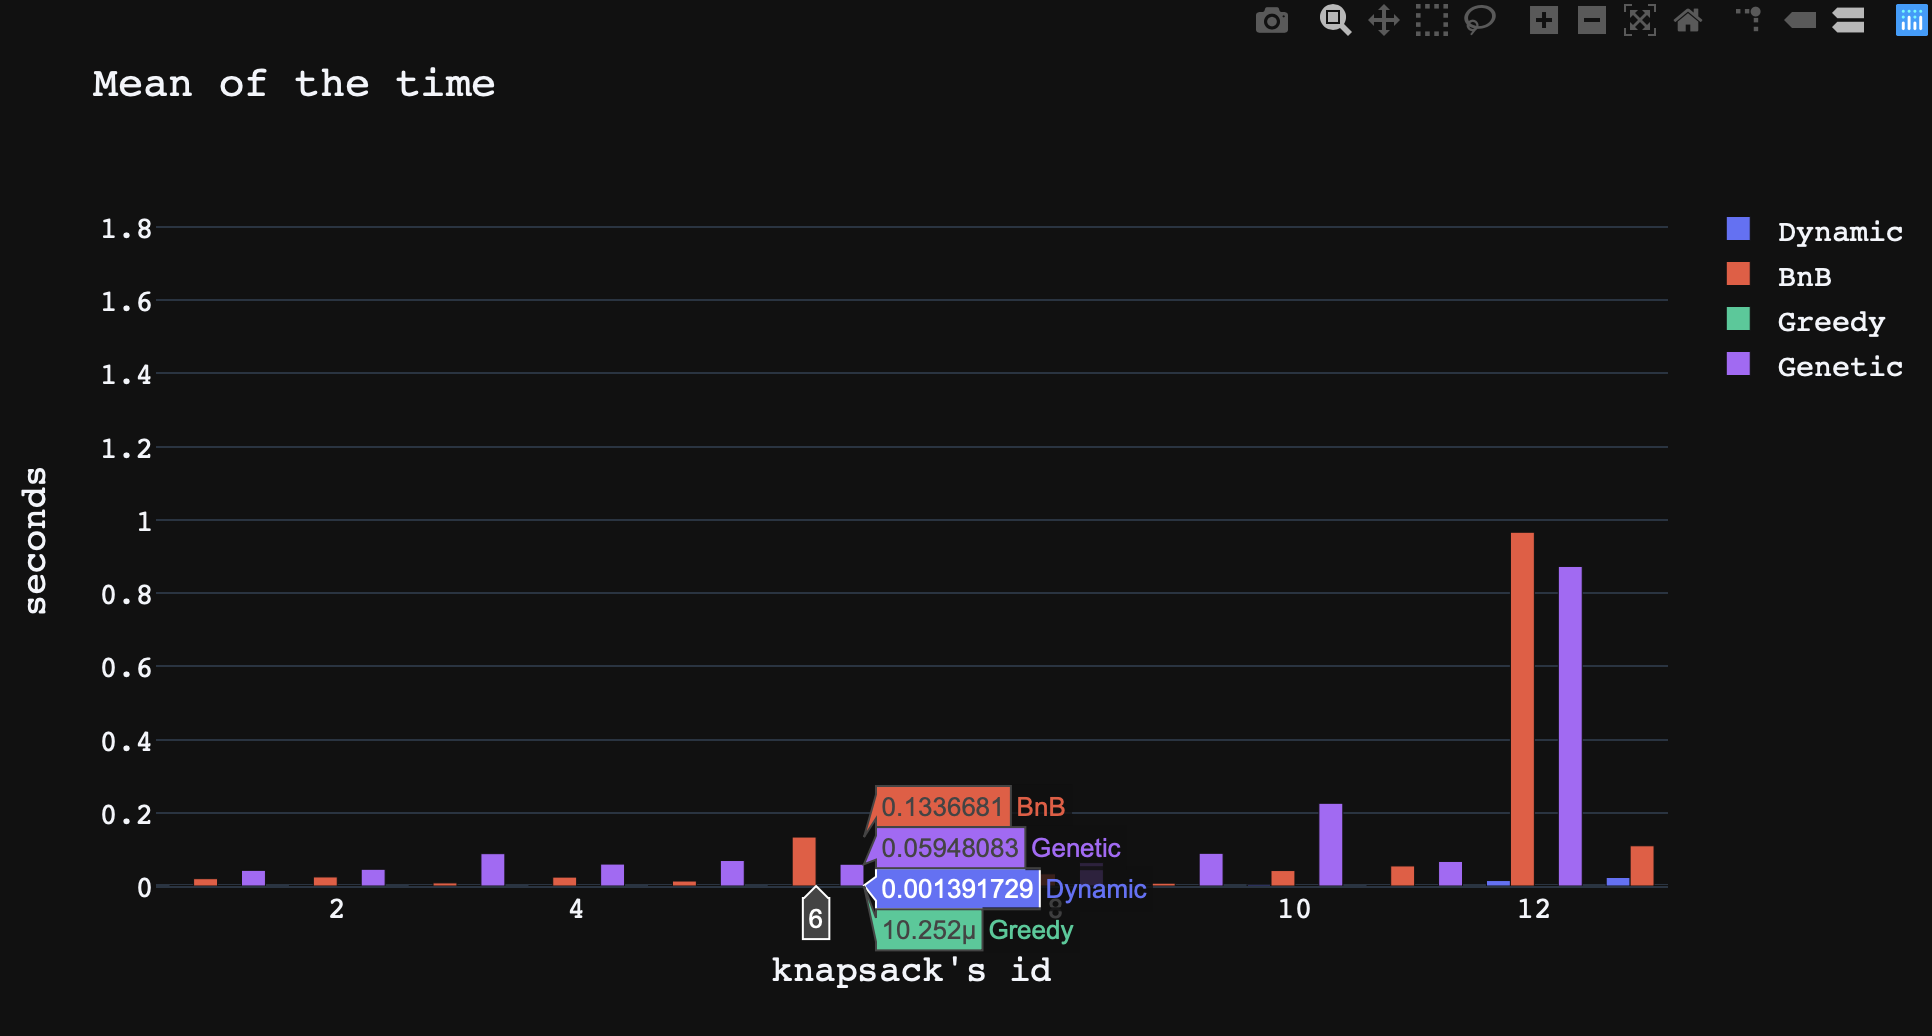

The interactive graph is [here]().

Greedy is always the fastest method.     
If you bring the chart closer you can see that the second place is Dynamic programming.      
And then either Branch and Bound or Genetic algorithm.

In [ ]:
table_test = run_tests(knapsacks, lim_sec=90)